# Entregable de Procesamiento de Imágenes

#### Córdoba, Victoria y García, Cecilia.

# Librerías

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
#!pip install opencv-python
import cv2
import numpy as np

import copy
import colorsys

### Ejercicio 1.1

Consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).


# Funciones

In [2]:
def normalizedRGB(rgb):
    """RGB values to [0,1]
    """
    return rgb / 255

def denormalizedRGB(rgb):
    """Return original RGB values
    """
    return (rgb * 255).round()

def rgb_to_yiq (img):
    """Pixels values to YIQ
    """
    for i, row in enumerate(img):
        for j, rgb in enumerate(row):
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            img[i][j][0] = 0.299*r + 0.587*g + 0.114*b
            img[i][j][1] = 0.596*r - 0.274*g - 0.322*b
            img[i][j][2] = 0.211*r - 0.523*g + 0.312*b
    return img


def in_range(img):
    """Check YIQ values within the range 
    y’<= 1, -0.5957 < i’ < 0.5957  and  -0.5226 < q’ < 0.5226 
    """
    img[:, :, 0] = np.where(img[:, :, 0] <= 1, img[:, :, 0], 1)
    img[:, :, 1] = np.where(img[:, :, 1] < 0.5957, img[:, :, 1], 0.5957)
    img[:, :, 1] = np.where(img[:, :, 1] > -0.5957, img[:, :, 1], -0.5957)
    img[:, :, 2] = np.where(img[:, :, 2] < 0.5226, img[:, :, 2], 0.5226)
    img[:, :, 2] = np.where(img[:, :, 2] > -0.5226, img[:, :, 2], -0.5226)
    
    return img 

def yiq_to_rgb(img):
    """YIQ pixels to RGB
    """
    for z, row in enumerate(img):
        for j, yiq in enumerate(row):
            y = yiq[0]
            i = yiq[1]
            q = yiq[2]
            img[z][j][0] = y + 0.956*i + 0.621*q
            img[z][j][1] = y - 0.272*i - 0.647*q
            img[z][j][2] = y - 1.106*i + 1.703*q
    return img  

def change_luminance(img, value):
    """Changes the luminance values of the imgage (Y channel) 
    """
    for z, row in enumerate(img):
        for j, yiq in enumerate(row):
            y = yiq[0]
            i = yiq[1]
            q = yiq[2]
            y*= value
            img[z][j][0] = y + 0.956*i + 0.621*q
            img[z][j][1] = y - 0.272*i - 0.647*q
            img[z][j][2] = y - 1.106*i + 1.703*q
    return img 

def change_saturation (img, sat_value):
    for z, row in enumerate(img):
        for j, yiq in enumerate(row):
            y = yiq[0]
            i = yiq[1]
            i*=sat_value
            q = yiq[2]
            q*=sat_value
            img[z][j][0] = y + 0.956*i + 0.621*q
            img[z][j][1] = y - 0.272*i - 0.647*q
            img[z][j][2] = y - 1.106*i + 1.703*q
    return img   

## Leemos imagen

Imagen original: AxesImage(54,36;334.8x217.44)


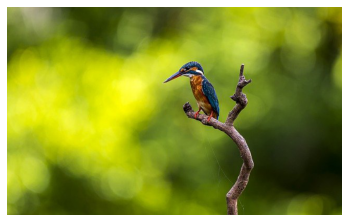

In [3]:
original_img = img.imread('kingfisher.jpg')
plt.axis('off')
print("Imagen original:", plt.imshow(original_img))

### Cambiamos la Luminancia de la Imagen original

In [4]:
#normalizamos imagen
img_norm= normalizedRGB(original_img) 

#llevamos a YIQ
new_yiq= rgb_to_yiq(img_norm)

#Verificamos que los valores no se vayan de rango YIQ min-max
new_img= in_range(new_yiq)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


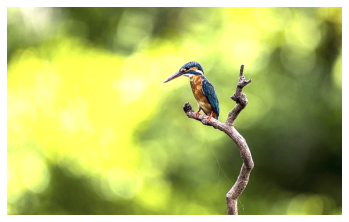

In [5]:
copia = copy.deepcopy(new_img)

#Aclaramos la imagen (y= 1.5)
img_clara = change_luminance(copia, 1.5)
plt.axis('off')
plt.imshow(img_clara)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


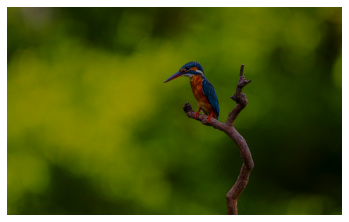

In [6]:
copia = copy.deepcopy(new_img)

#Oscurecemos la imagen (y= 1.5)
img_oscura = change_luminance(copia, 0.5)
plt.axis('off')
plt.imshow(img_oscura)

### Modificando Saturacion

Imagen en grises: AxesImage(54,36;334.8x217.44)


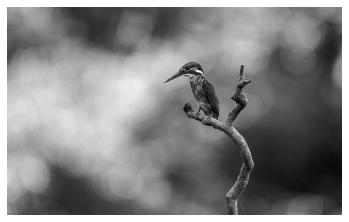

In [7]:
copia = copy.deepcopy(new_img)

#Llevamos la imagenes a escala de grises
img_grises= change_saturation (copia, 0)
plt.axis('off')
print("Imagen en grises:", plt.imshow(img_grises))

Imagen con saturacion 0.5: AxesImage(54,36;334.8x217.44)


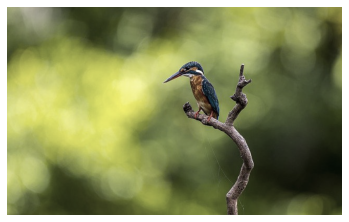

In [8]:
copia = copy.deepcopy(new_img)

#LLevamos saturacion a la mitad
img_2=  change_saturation (copia, 0.5)
plt.axis('off')
print("Imagen con saturacion 0.5:",plt.imshow(img_2))

<function matplotlib.pyplot.show(close=None, block=None)>

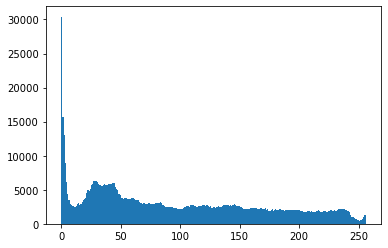

In [9]:
plt.hist(original_img.ravel(),256,[0,256]);plt.show

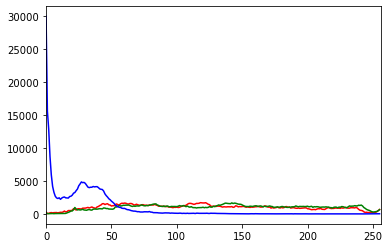

In [10]:
color = ("r","g","b")

for i, col in enumerate (color):
    histg=cv2.calcHist([original_img],[i],None,[256],[0,256])
    plt.plot(histg,color = col)
    plt.xlim([0,256])

    plt.show 

# Filtrado por convolución
## Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:

Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones. Pasabanda

## Definimos los Filtros

In [11]:
##Kernels pasabajos

p=1/9

b1=1/16
b2=2/16
b3=4/16

g1=1/256
g2=4/256
g3=6/256
    

pasabajo_plano=np.array([[p, p, p],
                         [p, p, p],
                         [p, p, p]
])                  

bartlett_3x3= np.array([[b1, b2, b1],
                        [b2, b3, b2],
                        [b1, b2, b1]
])
gaussiano_5x5=np.array([[g1, g2, g3, g2, g1], 
    [g2, g2*g2, g2*g3, g2*g2, g2],
    [g3, g3*g2, g3*g3, g3*g2, g3],
    [g2, g2*g2, g2*g3, g2*g2, g2],
    [g1, g2, g3, g2, g1]
])

# Kernel Pasabanda (Diferencia de Gaussianas)
# gaussiano 5x5 - gaussiano 3x3 (este ultimo es igual al bartlett 3x3)  

pasabanda=np.array([
    [g1, g2, g3, g2, g1],
    [g2, ((g2*g2)-b1), ((g2*g3)-b2), ((g2*g2)-b1), g2],
    [g3, ((g3*g2)-b2), ((g3*g3)-b3), ((g3*g2)-b2), g3],
    [g2, ((g2*g2)-b1), ((g2*g3)-b2), ((g2*g2)-b1), g2],
    [g1, g2, g3, g2, g1]
])


##Kernels pasaaltos (deteccion de bordes)

###Laplaciano vecino_4
laplaciano_v4 = np.array([[0, -1, 0],
                          [-1, 4, -1],
                          [0, -1, 0]
])

###Laplaciano vecino_8
laplaciano_v8 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]
])


## Kernels direccionales

sobel_norte=np.array([              
    [-1, -2, -1], 
    [0, 0, 0],
    [1, 2, 1]
])

sobel_sur=np.array([              
    [1, 2, 1], 
    [0, 0, 0],
    [-1, -2, -1]
])

sobel_este=np.array([              
    [1, 0, -1], 
    [2, 0, -2],
    [1, 0, -1]
])

sobel_oeste=np.array([              
    [-1, 0, 1], 
    [-2, 0, 2],
    [-1, 0, 1]
])



In [12]:
def conv_transform (image):
    image_copy= image.copy()
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            image_copy[i][j]= image[image.shape[0]-i-1][image.shape[1]-j-1]
    return image_copy

def convolution(image,kernel):
    '''Devuelve la imagen (img) convolucionada de acuerdo con el Kernel(k) ingresado
    '''
    normalized_rgb = normalizedRGB(image)
    R, G, B= normalized_rgb[:,:,0], normalized_rgb[:,:,1], normalized_rgb[:,:,2]
    imgGray= 0.2989 * R + 0.5870 * G + 0.1140 * B
    
    kernel= conv_transform (kernel)
    image_h=imgGray.shape[0]
    image_w=imgGray.shape[1]
    
    kernel_h= kernel.shape[0]
    kernel_w= kernel.shape[1]
    
    h=kernel_h//2
    w=kernel_w//2
    
    conv_image= np.zeros (imgGray.shape)
    
    for i in range(h, image_h- h):
        for j in range (w,image_w-w):
            sum = 0  
            
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum = sum + kernel [m][n]*imgGray[i-h+m][j-w+n] 
                    
            conv_image[i,j] = sum
    
    maximo= np.max(conv_image)
    convolved_image = conv_image*255/maximo
    convolved_image = convolved_image.astype(np.uint8)      
    return plt.imshow(convolved_image, cmap='gray')

(720, 1280, 3)

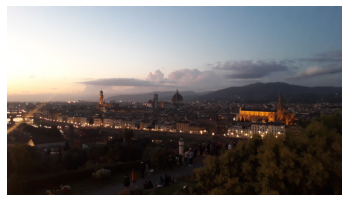

In [13]:
imagen = img.imread('florencia.jpg')
plt.axis('off')
plt.imshow(imagen)
imagen.shape

In [14]:
convolution(imagen,pasabajo_plano)

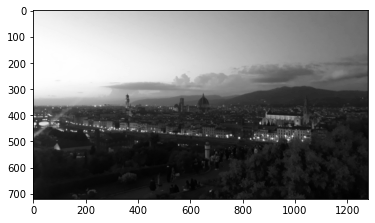

In [15]:
convolution (imagen,bartlett_3x3)

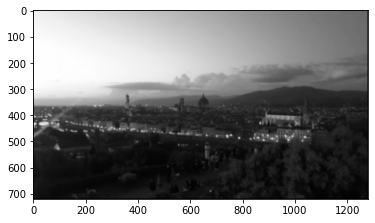

In [16]:
convolution(imagen, gaussiano_5x5)

In [17]:
convolution(imagen, laplaciano_v4)

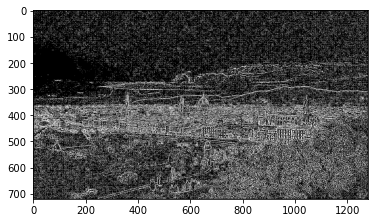

In [18]:
convolution(imagen, laplaciano_v8)

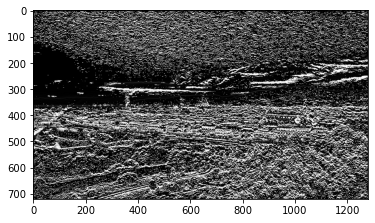

In [19]:
convolution(imagen, sobel_norte)

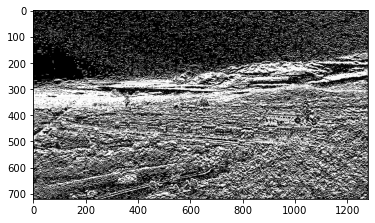

In [20]:
convolution(imagen, sobel_sur)

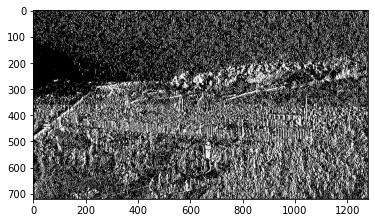

In [21]:
convolution(imagen, sobel_este)

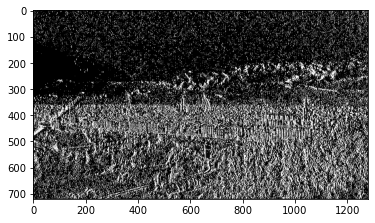

In [22]:
convolution(imagen, sobel_oeste)

In [23]:
convolution(imagen, pasabanda)

## Morfología de Imágenes 

In [24]:
im_wc = img.imread('wc.jpg')
plt.imshow(im_wc)
plt.axis('off')
im_wc.shape

(426, 640, 3)

In [26]:
def morphology(image,operation=None):
    '''Apply different morphological operations to an image
    '''
    normalized_rgb = normalizedRGB(image)
    yiq_image = rgb_to_yiq(normalized_rgb)
    luminance_channel=yiq_image[:, :, 0]
   
    #Define Kernel
    k= np.ones((3,3),np.uint8)
    image_h= luminance_channel.shape[0]    
    image_w= luminance_channel.shape[1]
    kernel_h= k.shape[0]   
    kernel_w= k.shape[1]
    w= (kernel_w-1)//2
  
    luminance2=cv2.copyMakeBorder(luminance_channel,w,w,w,w,cv2.BORDER_REPLICATE) 
    out= np.zeros((image_h,image_w),dtype="float")
    init_out= np.zeros((image_h,image_w),dtype="float")
            
    #morphological operations
    if operation=="dilation":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi= luminance2[y-w:y+w+1,x-w:x+w+1]
                core=roi.max()
            out[y-w:x-w]=core
                
    elif operation=="erosion":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi = luminance2[y-w:y+w+1,x-w:x+w+1]
                core = roi.min()
            out[y-w:x-w]=core
    
    elif operation=="median":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi = luminance2[y-w:y+w+1,x-w:x+w+1]
                core = roi.median()
            out[y-w:x-w]=core

    elif operation=="opening":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi = luminance2[y-w:y+w+1,x-w:x+w+1]
                core = roi.min()
                init_out[y-w:x-w]=core
            init_out=cv2.copyMakeBorder(init_out,w,w,w,w,cv2.BORDER_REPLICATE)
         
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=init_out[y-w:y+w+1,x-w:x+w+1]
                core=roi.max()
            out[y-w,x-w]=core

    elif operation=="closing":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=luminance2[y-w:y+w+1,x-w:x+w+1]
                core=roi.max()
                init_out[y-w:x-w]=core
            init_out=cv2.copyMakeBorder(init_out,w,w,w,w,cv2.BORDER_REPLICATE)

        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=init_out[y-w:y+w+1,x-w:x+w+1]
                core=roi.min()
            out[y-w,x-w]=core

    elif operation=="outer_edge":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=luminance2[y-w:y+w+1,x-w:x+w+1]
                core=roi.max()
                init_out[y-w,x-w]=core 
                out= np.subtract(init_out, luminance_channel)
  
    elif operation=="inner_edge":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=luminance2[y-w:y+w+1,x-pad:x+w+1]
                core=roi.min()
                init_out[y-w,x-w]=core   
                out= np.subtract(luminance_channel, init_out)
                
    elif operation=="top_hat":
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=luminance2[y-w:y+w+1,x-w:x+w+1] 
                core=roi.min()
                init_out[y-w,x-w]=core
            init_out=cv2.copyMakeBorder(init_out,w,w,w,w,cv2.BORDER_REPLICATE)
            
        for y in np.arange(w,image_h+w):
            for x in np.arange(w,image_w+w):
                roi=init_out[y-w:y+w+1,x-w:x+w+1]
                core=roi.max()
                out[y-w,x-w]=core     
            out= np.subtract(luminance_channel,out)   
    
    else:
            out=luminance_channel
            
    yiq_image2 = np.stack((out, yiq_image[:, :, 1] , yiq_image[:, :, 2]), axis=2)
    yiq_image2[:, :, 0] = np.where(yiq_image2[:, :, 0] <= 1, yiq_image2[:, :, 0], 1)             
    
    imgToRgb_image = yiq_to_rgb(yiq_image2)
    new_image = denormalizedRGB(imgToRgb_image)
    plt.imshow(new_image, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


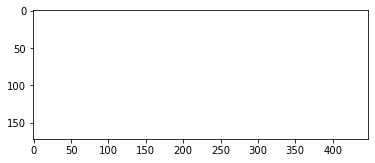

In [29]:
morphology(text, "dilation")
